<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/07_cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
NUM_CLASSES = 10

from tensorflow.keras.utils import to_categorical

# cnn을 위한 전처리 (channel을 위한 shape 추가)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted x.shape = ", x_train.shape)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

converted x.shape =  (60000, 28, 28, 1)


In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1499 - accuracy: 0.9525 - val_loss: 0.0434 - val_accuracy: 0.9866
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0367 - val_accuracy: 0.9874
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0302 - val_accuracy: 0.9915
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0328 - val_accuracy: 0.9912
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0310 - val_ac

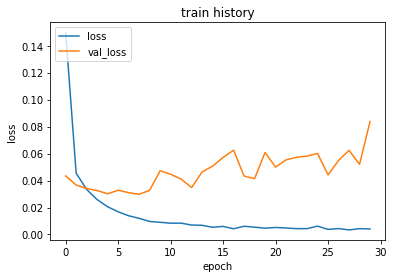

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3420 - accuracy: 0.8946 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1184 - accuracy: 0.9668 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0857 - accuracy: 0.9765 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0742 - accuracy: 0.9793 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0657 - accuracy: 0.9813 - val_loss: 0.0281 - val_accuracy: 0.9911
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0563 - accuracy: 0.9842 - val_loss: 0.0272 - val_accuracy: 0.9917
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0511 - accuracy: 0.9857 - val_loss: 0.0264 - val_ac

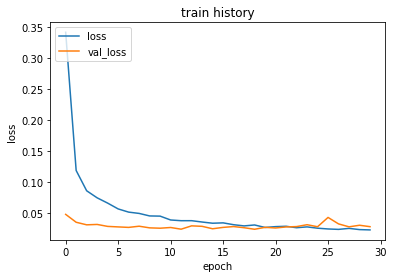

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('train history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# VGG-16

In [ ]:
image_path = keras.utils.get_file("dog.jpg", "https://github.com/kotech1/computervision/blob/master/img/dog.jpg?raw=true")

163840/163759 [==============================] - 0s 0us/step


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)


img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02110063', 'malamute', 0.32372478), ('n02110185', 'Siberian_husky', 0.21747164), ('n02109961', 'Eskimo_dog', 0.15270998)]


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 01_yolo
'Awesome Note'
 checkpoint
'Colab Notebooks'
'Copy of K-MOOC 한글화 용어사전.gsheet'
'Copy of kmooc survey copied.gform'
 data
 efficientdet-d0-finetune
 extracted_chris.zip
'Google 노트에서 가져온 문서 - 내 첫 번째 노트.gdoc'
 집.gslides
 시사.gslides
 imagenette2-320.tar.gz
 keras-yolo4.tar.gz
 Physics
 practice.gdoc
 saved_model
 tfrecord
 tt
'Untitled Document.gdoc'
 VOC2012test.tar
 voc_config.yaml
 VOCdevkit
 VOCtest_06-Nov-2007.tar
'VOCtrainval_06-Nov-2007 (1).tar'
 VOCtrainval_06-Nov-2007.tar
 VOCtrainval_11-May-2012.tar
 yolov3


In [ ]:
%%bash
wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz


In [6]:
!ls /mydrive/image*

/mydrive/imagenette2-320.tar.gz


In [7]:
!tar xvzf /mydrive/imagenette2-320.tar.gz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
imagenette2-320/train/n02102040/n02102040_1343.JPEG
imagenette2-320/train/n02102040/n02102040_487.JPEG
imagenette2-320/train/n02102040/n02102040_2516.JPEG
imagenette2-320/train/n02102040/n02102040_503.JPEG
imagenette2-320/train/n02102040/n02102040_2634.JPEG
imagenette2-320/train/n02102040/n02102040_5028.JPEG
imagenette2-320/train/n02102040/n02102040_5214.JPEG
imagenette2-320/train/n02102040/n02102040_3806.JPEG
imagenette2-320/train/n02102040/n02102040_467.JPEG
imagenette2-320/train/n02102040/n02102040_8208.JPEG
imagenette2-320/train/n02102040/n02102040_7124.JPEG
imagenette2-320/train/n02102040/n02102040_213.JPEG
imagenette2-320/train/n02102040/n02102040_35.JPEG
imagenette2-320/train/n02102040/n02102040_3997.JPEG
imagenette2-320/train/n02102040/n02102040_7617.JPEG
imagenette2-320/train/n02102040/n02102040_3699.JPEG
imagenette2-320/train/n02102040/n02102040_5136.JPEG
imagenette2-320/train/n02102040/n02102040_3593.JPEG
imagenette2-320/train/n02102040/n0

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow import keras
import numpy as np

SAVE_DIR = '/mydrive'
model = VGG16(weights=None, classes=10)
try:
  model.load_weights(SAVE_DIR+'/best_model.h5')
  print('load done')
except:
  pass
#print(model.summary())
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# create a data generator
datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

DATA_DIR = 'imagenette2-320'

# load and iterate training dataset
train_it = datagen.flow_from_directory(DATA_DIR+'/train/', target_size=(224, 224), class_mode='categorical', batch_size=64)
# load and iterate validation dataset
val_it = datagen.flow_from_directory(DATA_DIR+'/val/', target_size=(224, 224), class_mode='categorical', batch_size=64)
# load and iterate test dataset
#test_it = datagen.flow_from_directory(DATA_DIR+'/test/', class_mode='binary', batch_size=64)

checkpoint = ModelCheckpoint(SAVE_DIR+"/best_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

from tensorflow.keras.callbacks import Callback

class LrReducer(Callback):
    def __init__(self, patience=0, reduce_rate=0.5, reduce_nb=10, verbose=1):
        super(Callback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.best_score = -1.
        self.reduce_rate = reduce_rate
        self.current_reduce_nb = 0
        self.reduce_nb = reduce_nb
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        #current_score = logs.get('val_accuracy')
        current_score = logs.get('accuracy')
        if current_score > self.best_score:
            self.best_score = current_score
            self.wait = 0
            if self.verbose > 0:
                print('---current best score: %.3f' % current_score)
        else:
            if self.wait >= self.patience:
                self.current_reduce_nb += 1
                if self.current_reduce_nb <= 10:
                    lr = keras.backend.get_value(self.model.optimizer.lr)
                    keras.backend.set_value(self.model.optimizer.lr, lr*self.reduce_rate)
                    if self.verbose > 0:
                        print('---lr decreasing: %e' % (lr*self.reduce_rate))
                else:
                    if self.verbose > 0:
                        print("Epoch %d: early stopping" % (epoch))
                    self.model.stop_training = True
            self.wait += 1
lrreducer = LrReducer(patience=5)
# fit model
#model.fit_generator(train_it, steps_per_epoch=16, validation_data=val_it, validation_steps=8)
history = model.fit(train_it, steps_per_epoch=16, validation_data=val_it, 
          validation_steps=8, 
          epochs=100, callbacks=[checkpoint,lrreducer])


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 6.2390 - accuracy: 0.0977
Epoch 00001: loss improved from inf to 6.23899, saving model to /mydrive/best_model.h5
---current best score: 0.098
16/16 [==============================] - 25s 2s/step - loss: 6.2390 - accuracy: 0.0977 - val_loss: 2.3017 - val_accuracy: 0.1172
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.3030 - accuracy: 0.0908
Epoch 00002: loss improved from 6.23899 to 2.30302, saving model to /mydrive/best_model.h5
16/16 [==============================] - 38s 2s/step - loss: 2.3030 - accuracy: 0.0908 - val_loss: 2.2997 - val_accuracy: 0.1016
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 2.3048 - accuracy: 0.0967
Epoch 00003: loss did not improve from 2.30302
16/16 [==============================] - 15s 968ms/step - loss: 2.3048 - accuracy: 0.0967 - val_loss: 2.3032 - val_ac

In [ ]:
lr=keras.backend.get_value(model.optimizer.lr)
print('---lr decreasing: %e' % (lr*0.5))
print(lr)

---lr decreasing: 2.441406e-07
4.882813e-07


In [ ]:
!tar xfvz /mydrive/imagenette2-320.tar.gz

In [ ]:
!ls

gdrive	imagenette2-320  sample_data


In [ ]:
!ls -a

.  ..  .config	gdrive	imagenette2-320  sample_data


In [ ]:
!ls -a /


.	 datalab     lib    mydrive		  run	 tensorflow-1.15.2
..	 dev	     lib32  mydrivebest_model.h5  sbin	 tmp
bin	 .dockerenv  lib64  opt			  srv	 tools
boot	 etc	     media  proc		  swift  usr
content  home	     mnt    root		  sys	 var


In [ ]:
!ls -a /root/.keras

.  ..  keras.json


In [11]:
!du -sh /mydrive

0	/mydrive


In [12]:
!ls /mydrive

 01_yolo
'Awesome Note'
 best_model.h5
 checkpoint
'Colab Notebooks'
'Copy of K-MOOC 한글화 용어사전.gsheet'
'Copy of kmooc survey copied.gform'
 data
 efficientdet-d0-finetune
 extracted_chris.zip
'Google 노트에서 가져온 문서 - 내 첫 번째 노트.gdoc'
 집.gslides
 시사.gslides
 imagenette2-320.tar.gz
 keras-yolo4.tar.gz
 Physics
 practice.gdoc
 saved_model
 tfrecord
'Untitled Document.gdoc'
 VOC2012test.tar
 voc_config.yaml
 VOCdevkit
 VOCtest_06-Nov-2007.tar
'VOCtrainval_06-Nov-2007 (1).tar'
 VOCtrainval_06-Nov-2007.tar
 VOCtrainval_11-May-2012.tar
 yolov3


In [17]:
!nvidia-smi

Mon Oct  5 03:36:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |  14575MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
!du -sh *

411M	01_yolo
45K	Awesome Note
1.6G	best_model.h5
512	checkpoint
15M	Colab Notebooks
512	Copy of K-MOOC 한글화 용어사전.gsheet
512	Copy of kmooc survey copied.gform
2.5G	data
1.5G	efficientdet-d0-finetune
17M	extracted_chris.zip
512	Google 노트에서 가져온 문서 - 내 첫 번째 노트.gdoc
512	집.gslides
512	시사.gslides
326M	imagenette2-320.tar.gz
459M	keras-yolo4.tar.gz
4.5K	Physics
512	practice.gdoc
290M	saved_model
641M	tfrecord
512	Untitled Document.gdoc
1.8G	VOC2012test.tar
0	voc_config.yaml
du: cannot read directory 'VOCdevkit/VOC2012/JPEGImages': Input/output error
51M	VOCdevkit
431M	VOCtest_06-Nov-2007.tar
439M	VOCtrainval_06-Nov-2007 (1).tar
439M	VOCtrainval_06-Nov-2007.tar
1.9G	VOCtrainval_11-May-2012.tar
476M	yolov3
